# Phân phối chuẩn

## PDF

Hàm pdf của phân phối chuẩn:
\begin{align}
f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
\end{align}

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
def normal_pdf(x: float, mu: float=0, sigma: float=1) -> float:
    """Return the probability density of a normal distribution at x.
    """

    return np.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (np.sqrt(2 * np.pi) * sigma)

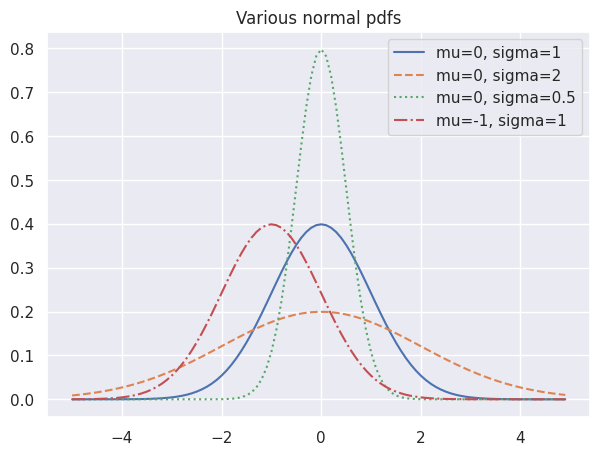

In [ ]:
# Plot some of these pdf to see what they look like
x = np.arange(-5, 5, 0.1)      # x is in range [-5, 5]

mu_ = [0, 0, 0, -1]
sigma_ = [1, 2, 0.5, 1]
ls = ['-', '--', ':', '-.']

plt.figure(figsize=(7, 5))
for i, (mu, sigma) in enumerate(zip(mu_, sigma_)):
    y = normal_pdf(x, mu, sigma)              # vectorization
    plt.plot(x, y, linestyle=ls[i], label=f'mu={mu}, sigma={sigma}')
plt.legend()
plt.title('Various normal pdfs')
plt.show()

Ta có thể biến đổi qua lại giữa phân phối chuẩn bất kỳ và phân phối chuẩn chuẩn tắc bằng hai công thức sau:
\begin{align}
X &= \sigma Z + \mu \\
Z &= (X - \mu) / \sigma
\end{align}
với $Z \sim \mathcal{N}(0, 1), X \sim \mathcal{N}(\mu, \sigma)$.

## CDF

In [ ]:
from scipy.special import erf

In [ ]:
def normal_cdf(x: float, mu: float=0, sigma: float=1) -> float:
    """Return the cumulative distribution function of a normal distribution at x.

    NOTE: The normal distribution cannot be written in an “elementary” manner,
    but we can write it using Python’s math.erf error function.
    """

    return (1 + erf((x - mu) / np.sqrt(2) / sigma)) / 2

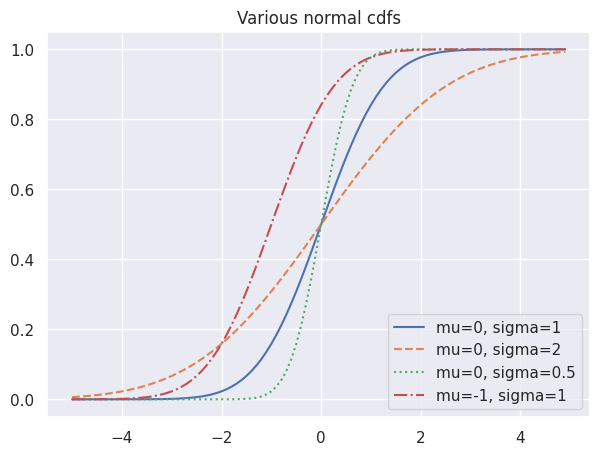

In [ ]:
# Plot several cdfs
x = np.arange(-5, 5, 0.1)

# This is same as above
mu_ = [0, 0, 0, -1]
sigma_ = [1, 2, 0.5, 1]
ls = ['-', '--', ':', '-.']

plt.figure(figsize=(7, 5))
for i, (mu, sigma) in enumerate(zip(mu_, sigma_)):
    plt.plot(x, normal_cdf(x, mu, sigma), ls=ls[i], label=f'mu={mu}, sigma={sigma}')
plt.legend(loc=4)     # bottom right
plt.title('Various normal cdfs')
plt.show()

## Quantile (inverse CDF)

In [ ]:
def inverse_normal_cdf(p: float, mu: float=0, sigma: float=1, tol: float=1e-5) -> float:
    """Find approximate inverse (quantile) using binary search.

    Params:
    - tol: error of the value returned.
    """

    # If not standard, compute standard and rescale
    if (mu != 0) or (sigma != 1):
        return mu + sigma * inverse_normal_cdf(p, tol)    # recurrence relation: compute inverse of standard normal distribution

    low_z, high_z = -10.0, 10.0              # normal_cdf(-10)(10) is (very close to) 0 (1)
    while high_z - low_z > tol:
        mid_z = (low_z + high_z) / 2         # consider the midpoint
        mid_p = normal_cdf(mid_z)            # compute CDF of the midpoint
        if mid_p < p:
            low_z = mid_z                    # midpoint too low, search above it
        else:
            high_z = mid_z                   # midpoint too high, seach below it

    return mid_z

Nhận xét:
- Ý tưởng của hàm trên: cho xác suất $p$, ta chia đôi khoảng $[-10, 10]$, tính giá trị cdf của giá trị ở giữa thu được. Nếu giá trị này lớn hơn (nhỏ hơn) $p$ thì ta co 2 biên lại tương ứng, rồi sau đó tiếp tục chia đôi đến khi độ dài khoảng tìm kiếm nhỏ hơn sai số tol. Khi đó ta sẽ thu được giá trị xấp xỉ tương ứng với cdf là $p$.
- Câu lệnh return ở dòng thứ 2 chính là công thức đầu tiên $X = \sigma Z+ \mu$ ở trên, tức ta sẽ tính hàm quantile của $X$ dựa vào hàm quantile của phân phối $\mathcal{N}(0, 1)$.

# The CLT

Phát biểu:

Ví dụ: Ta sẽ đi xấp xỉ biến ngẫu nhiên nhị thức Binomial$(n, p)$ là tổng của $n$ biến ngẫu nhiên Bernoulli$(p)$ độc lập.

In [ ]:
def bernoulli_trial(p: float) -> int:
    """Return 1 with probability p and 0 with probability 1 - p.
    """

    return 1 if np.random.random() < p else 0     # return random floats in the half-open interval [0.0, 1.0)

In [ ]:
def binomial(n: int, p: float) -> int:
    """Returns the sum of n Bernoulli(p) trial.
    """

    return sum(bernoulli_trial(p) for _ in range(n))    # return the number of head in n trial

Nhận xét: Biến ngẫu nhiên nhị thức tương ứng với phát biểu rằng tung đồng xu $n$ lần và quan sát số lần mặt ngửa.

In [ ]:
from collections import Counter


def binomial_histogram(p: float, n: int, n_points: int) -> None:
    """Pick points from a Binomial(n, p) and plots their histogram.
    """

    data = [binomial(n, p) for _ in range(n_points)]       # a list of the number of heads

    # Use a bar chart to show the actual binomial samples
    histogram = Counter(data)                              # count the number of heads from 0 to n_points
    plt.bar(histogram.keys(),
            [n_heads / n_points for n_heads in histogram.values()],
            0.8, color='b')

    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    # Use a line chart to show the normal approximation of binomial samples
    x = np.arange(min(data) - 5, max(data) + 5)
    y = normal_pdf(x, mu, sigma)
    plt.plot(x, y, ls='-', color='r')

    plt.title("Binomial distribution vs Normal distribution")
    plt.show()

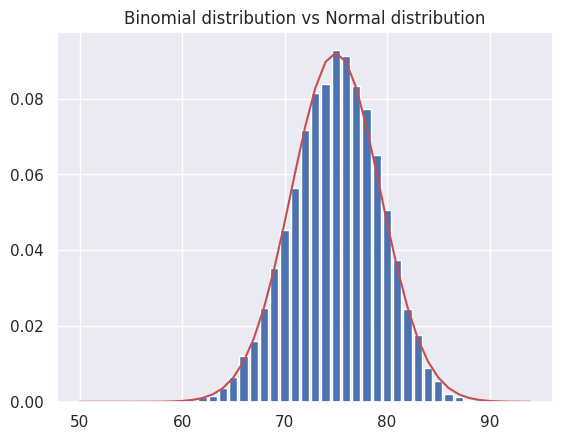

In [ ]:
binomial_histogram(p=0.75, n=100, n_points=10_000)

Nhận xét: